# Q1

**What will be the size of image(100,50) if we rotate anticlockwisely at angle of:**
* $180^0$
* $90^0$ 

*Solution*

Number of row = 100
Number of column = 50

1. if rotate at an angle $90^0$ anticlockwisely, the row will be **50** while the column will be **100**.
2. if rotate at an angle $180^0$ anticlockwisely, the image is completely flipped; hence, having the same dimension but different direction.

# Q2

**Import an image and rotate it as follows:**

* $180^0$ anticlockwise
* $90^0$ clockwise

Hint: clockwise will be initiated with -ve while anticlockwise will be +ve.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img = cv2.imread('../images/ein.jpg', cv2.IMREAD_GRAYSCALE)

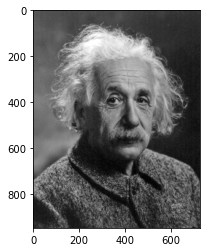

In [3]:
plt.imshow(img, cmap='gray');

In [4]:
img.shape

(949, 728)

In [5]:
numRows, numCols = img.shape

**Solution ($180^0$)**

In [6]:
# angle of rotation
a = 180

# convert from radian to deg and do the trig
sina = np.sin(np.deg2rad(a))
cosa = np.cos(np.deg2rad(a))

# rotational matrix
R_M = np.array([[cosa, -sina],[sina, cosa]])

# max row and max col
rMax, cMax = numRows,numCols

# define the cordinates
cords = np.array([[0,0],
                  [0,cMax-1],
                  [rMax-1, 0],
                  [rMax-1,cMax-1]
                 ])

In [7]:
R_M

array([[-1.0000000e+00, -1.2246468e-16],
       [ 1.2246468e-16, -1.0000000e+00]])

In [8]:
cords

array([[  0,   0],
       [  0, 727],
       [948,   0],
       [948, 727]])

In [9]:
# calculate A'
A_dash = R_M.dot(cords.T)

# find min and max of A'
mins = A_dash.min(axis=1)
maxs = A_dash.max(axis=1)

# find minR,maxR,minC,maxC
minR = np.int64(np.floor(mins[0]))
minC = np.int64(np.floor(mins[1]))
maxR = np.int64(np.ceil(maxs[0]))
maxC = np.int64(np.ceil(maxs[1]))

# compute for Height and Width
H,W = maxR-minR+1, maxC-minC+1

# resultant image (I2)
I2 = np.zeros((H,W), dtype="uint8")

In [10]:
A_dash

array([[ 0.00000000e+00, -8.90318223e-14, -9.48000000e+02,
        -9.48000000e+02],
       [ 0.00000000e+00, -7.27000000e+02,  1.16096517e-13,
        -7.27000000e+02]])

In [11]:
# bilinear interpolation

def bilinearInterpolate(row,col,I):
    lc = int(col)
    rc = lc + 1
    wr = col - lc
    wl = rc - col
    tr = int(row)
    br = tr + 1
    wt = br - row
    wb = row - tr
    if tr >= 0 and br < I.shape[0] and lc >= 0 and rc < I.shape[1]:
        a = wl * I[tr,lc] + I[tr,rc]
        b = wl * I[br,lc] + wr*I[br,rc]
        g = wt * a + wb * b

        return np.uint8(g)
    else:
        return 0

In [12]:
Tinv = np.linalg.inv(R_M)
for new_i in range(minR,maxR):
    for new_j in range(minC, maxC):
        P_dash = np.array([new_i,new_j])
        P = Tinv.dot(P_dash)
        i, j = P[0],P[1]
        if i < 0 or i >= numRows or j < 0 or j >= numCols:
            pass
        else:
            g = bilinearInterpolate(i,j,img)
            I2[new_i-minR,new_j-minC] = g

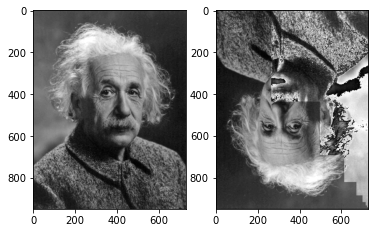

In [13]:
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(I2, cmap="gray");

**Solution for $90^0$ clockwise.**

In [14]:
a = -90
cosa = np.cos(np.deg2rad(a))
sina = np.sin(np.deg2rad(a))
R_M = np.array([[cosa,-sina],[sina, cosa]])
rMax, cMax = numRows,numCols
cords = np.array([[0,0],[rMax-1,0],[0,cMax-1],[rMax-1,cMax-1]])
A_dash = R_M.dot(cords.T)
mins = A_dash.min(axis=1)
maxs = A_dash.max(axis=1)
minR = np.int64(np.floor(mins[0]))
minC = np.int64(np.floor(mins[1]))
maxR = np.int64(np.floor(maxs[0]))
maxC = np.int64(np.floor(maxs[1]))
H,W = maxR-minR+1, maxC-minC+1
I2 = np.zeros((H,W), dtype='uint8')

In [15]:
Tinv = np.linalg.inv(R_M)
for new_i in range(minR,maxR):
    for new_j in range(minC, maxC):
        P_dash = np.array([new_i,new_j])
        P = Tinv.dot(P_dash)
        i, j = P[0],P[1]
        if i < 0 or i >= numRows or j < 0 or j >= numCols:
            pass
        else:
            g = bilinearInterpolate(i,j,img)
            I2[new_i-minR,new_j-minC] = g

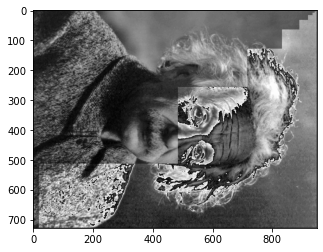

In [16]:
plt.imshow(I2, cmap="gray");

# Q3

**Rotate images using OpenCV**

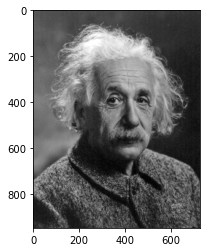

In [17]:
plt.imshow(img,cmap='gray')

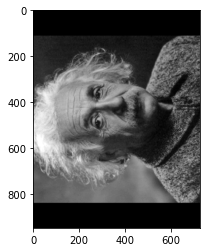

In [18]:
img_center = tuple(np.array(img.shape[1::-1])/2)
angle = 90
scale = 1.0 #increasing the scale will make it zoom in or out

# Rotation matrix
R_M = cv2.getRotationMatrix2D(img_center,angle,scale)

# image resultant
I2 = cv2.warpAffine(img, R_M, img.shape[::-1])

# show image
plt.imshow(I2, cmap='gray')

# Q4
**Reflection using OpenCv**

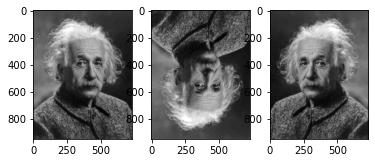

In [21]:
# 0 for reflection on x-axis and 1 for reflection on y-ax
ref_x = cv2.flip(img,0)
ref_y = cv2.flip(img,1)

plt.subplot(131)
plt.imshow(img, cmap="gray")

plt.subplot(132)
plt.imshow(ref_x, cmap="gray")

plt.subplot(133)
plt.imshow(ref_y, cmap="gray");